# Introduction

- Normally, we would be doing our querying in a DBMS, but for the sake of showcasing, SQL queries on this database will be done in Jupyter Labs
- To run SQL queries in Jupyter, we have to add %%sql on its own line to the start of our query.
- We'll be doing this for every query we make, and are using jupyter for reproducability.

## Connecting to database and installing necessary packages

In [1]:
# import necessary packages
import pandas as pd
import sqlite3

In [2]:
# This is the workflow for working with SQL in python. You have to:
# establish a connection to the database
# instantiate a cursor class to "navigate" the database
# execute queries on the database using the cursor, combining SQL and python to do so.

conn = sqlite3.connect("factbook.db")
q1 = "SELECT * FROM sqlite_master WHERE type='table';"
r = conn.cursor()

# turning the results of every query into a pandas dataframe makes it more readable.
pd.read_sql_query(q1, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


# Overview of the Data

In [3]:
# let's take a look at the first five rows of the db to get acquainted.
# from the code above, we know the table is called 'facts'
q2 = 'SELECT * FROM facts limit 5;'

pd.read_sql_query(q2,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [4]:
# let's take a look at MIN AND MAX for population and growth to start
q3 = '''
SELECT 
MIN(population) min_pop,
MAX(population) max_pop,
MIN(population_growth) min_pop_growth,
MAX(population_growth) max_pop_growth
FROM facts;
'''
pd.read_sql_query(q3, conn)

,min_pop,max_pop,min_pop_growth,max_pop_growth
0,0,7256490011,0.0,4.02


there's a country with a population of 0 and another with more than 7.2 billion people. That seems off. We'll investigate

In [5]:
q4 = '''
SELECT * 
FROM facts
WHERE population == (
    SELECT MIN(population) 
    FROM facts);
'''
pd.read_sql_query(q4, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


Okay. Antarctica. That's fair. What about the country with the mega population?

In [6]:
q5 = '''
SELECT *
FROM facts
WHERE population == (
    SELECT MAX(population)
    FROM facts);
'''
pd.read_sql_query(q5, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


Ah. Well the world has its own country code. This would actually be a good baseline to determine which countries fall above and below the world average for each category

In [7]:
# how many countries are there?
q6 = '''
SELECT COUNT(*)
FROM facts
'''
pd.read_sql_query(q6, conn)

,COUNT(*)
0,261


In [8]:
# of these 261, how many are below the average death rate for this data?
# we returned a table of 124 rows. 47% of countries have a lower death rate than the average.
q6 = '''
SELECT *
FROM facts
WHERE death_rate < (SELECT AVG(death_rate) FROM facts)
ORDER BY death_rate;
'''
pd.read_sql_query(q6, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,141,qa,Qatar,11586.0,11586.0,0.0,2194817,3.07,9.84,1.53,22.39
1,184,ae,United Arab Emirates,83600.0,83600.0,0.0,5779760,2.58,15.43,1.97,12.36
2,93,ku,Kuwait,17818.0,17818.0,0.0,2788534,1.62,19.91,2.18,1.58
3,13,ba,Bahrain,760.0,760.0,0.0,1346613,2.41,13.66,2.69,13.09
4,251,gz,Gaza Strip,360.0,360.0,0.0,1869055,2.81,31.11,3.04,0.00
5,241,tk,Turks and Caicos Islands,948.0,948.0,0.0,50280,2.30,16.13,3.10,9.94
6,151,sa,Saudi Arabia,2149690.0,2149690.0,0.0,27752316,1.46,18.51,3.33,0.55
7,131,mu,Oman,309500.0,309500.0,0.0,3286936,2.07,24.44,3.36,0.43
8,156,sn,Singapore,697.0,687.0,10.0,5674472,1.89,8.27,3.43,14.05
9,254,we,West Bank,5860.0,5640.0,220.0,2785366,1.95,22.99,3.50,0.00


In [9]:
# what about the countries with the highest death_rate?
q7 = '''
SELECT *
FROM facts
ORDER BY death_rate DESC
LIMIT 5;
'''
pd.read_sql_query(q7, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,98,lt,Lesotho,30355,30355,0,1947701,0.32,25.47,14.89,7.36
1,183,up,Ukraine,603550,579330,24220,44429471,0.60,10.72,14.46,2.25
2,26,bu,Bulgaria,110879,108489,2390,7186893,0.58,8.92,14.44,0.29
3,71,pu,Guinea-Bissau,36125,28120,8005,1726170,1.91,33.38,14.33,0.00
4,96,lg,Latvia,64589,62249,2340,1986705,1.06,10.00,14.31,6.26


These countries have the highest death_rate according to the CIA, we can create subqueries to learn more about these and similar countries with high death rates

In [10]:
# all of these countries have have a death rate above 14. Let's see how many have a death rate above 10
q8 ='''
SELECT *
FROM facts
WHERE death_rate > 10.00
ORDER BY population DESC
LIMIT 10
'''

pd.read_sql_query(q8, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,197,ee,European Union,4324782,NaN,NaN,513949445,0.25,10.20,10.20,2.50
1,129,ni,Nigeria,923768,910768.0,13000.0,181562056,2.45,37.64,12.90,0.22
2,143,rs,Russia,17098242,16377742.0,720500.0,142423773,0.04,11.60,13.69,1.69
3,65,gm,Germany,357022,348672.0,8350.0,80854408,0.17,8.47,11.42,1.24
4,40,cg,"Congo, Democratic Republic of the",2344858,2267048.0,77810.0,79375136,2.45,34.88,10.07,0.27
5,83,it,Italy,301340,294140.0,7200.0,61855120,0.27,8.74,10.19,4.10
6,183,up,Ukraine,603550,579330.0,24220.0,44429471,0.60,10.72,14.46,2.25
7,139,pl,Poland,312685,304255.0,8430.0,38562189,0.09,9.74,10.19,0.46
8,182,ug,Uganda,241038,197100.0,43938.0,37101745,3.24,43.79,10.69,0.74
9,1,af,Afghanistan,652230,652230.0,0.0,32564342,2.32,38.57,13.89,1.51


It's good that we're seeing the EU as part of this, the NaN values mean we definitely have a data cleanliness issue. Outside of that, we can see that countries that tend to have this problem are in eastern Europe, the middle east, and northern and central Africa

In [11]:
# let's look at population density doing a little of summary statistics. Who are the most crowded?
q9 = '''
SELECT name, population / area AS ppl_per_km
FROM facts
WHERE population > (
    SELECT AVG(population)
    FROM facts)
AND area < (
    SELECT AVG(area)
    FROM facts);
'''
pd.read_sql_query(q9, conn)

,name,ppl_per_km
0,Bangladesh,1138
1,Germany,226
2,Japan,335
3,Philippines,336
4,Thailand,132
5,United Kingdom,263
6,Vietnam,284


All of the above countries are highly crowded. Squeeze in tight!

In [14]:
# Lets also look at immigration. Who is going where?
q10 = '''
SELECT name, migration_rate
FROM FACTS
ORDER BY migration_rate DESC
'''
pd.read_sql_query(q10, conn)

,name,migration_rate
0,Qatar,22.39
1,American Samoa,21.13
2,"Micronesia, Federated States of",20.93
3,Syria,19.79
4,Tonga,17.84
5,British Virgin Islands,17.28
6,Luxembourg,17.16
7,Cayman Islands,14.40
8,Singapore,14.05
9,Nauru,13.63


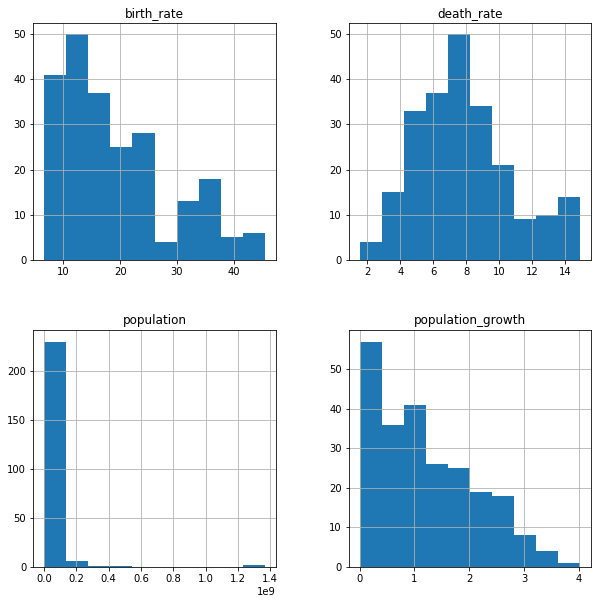

In [17]:
# let's make a quick visualization to look at our data differently
# importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

q11 = '''
SELECT population, population_growth, birth_rate, death_rate
FROM facts
WHERE population != (
    SELECT MAX(population) 
    FROM facts)
AND population != (
    SELECT MIN(population) 
    FROM facts);
'''
pd.read_sql_query(q11, conn).hist(ax=ax);

In [19]:
# closing database connection.
conn.close()